In [1]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,10.51,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.05,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.660173
ACSH       0.660173
AWND       0.512182
DAPR       0.999535
FMTM       0.872652
FRGT       0.999884
MDPR       0.999535
PGTM       0.505030
PRCP       0.016340
SNOW       0.338257
SNWD       0.331046
TAVG       0.881549
TMAX       0.000640
TMIN       0.000814
TSUN       0.933070
WDF1       0.660173
WDF2       0.512124
WDF5       0.517241
WDFG       0.751875
WSF1       0.660173
WSF2       0.512066
WSF5       0.517241
WSFG       0.751875
WT01       0.779148
WT02       0.980287
WT03       0.992964
WT04       0.999767
WT05       0.998372
WT07       0.999884
WT08       0.812351
WT09       0.999884
WT16       0.886317
WT18       0.999826
dtype: float64

In [4]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [5]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [6]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016340
snow          0.338257
snow_depth    0.331046
temp_max      0.000640
temp_min      0.000814
dtype: float64

In [7]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [8]:
del core_weather["snow"]

In [9]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [10]:
del core_weather["snow_depth"]

In [11]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [12]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [13]:
core_weather["precip"].value_counts()

0.00    13963
0.01      442
0.02      202
0.03      123
0.04      105
        ...  
1.73        1
1.05        1
1.38        1
1.95        1
5.01        1
Name: precip, Length: 178, dtype: int64

In [14]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [15]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [16]:
core_weather = core_weather.fillna(method="ffill")

In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [18]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
       '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31'],
      dtype='object', name='DATE', length=17197)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=17197, freq=None)

In [25]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

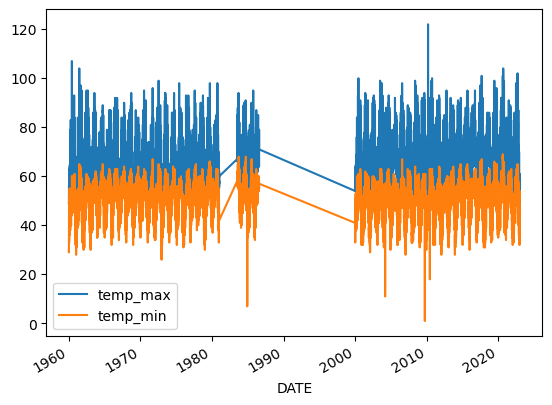

In [26]:
core_weather[["temp_max", "temp_min"]].plot()

In [27]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

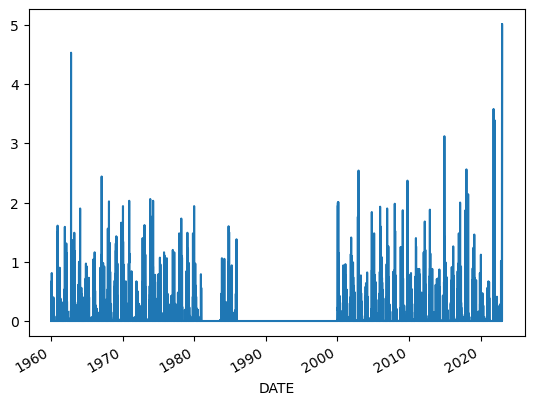

In [28]:
core_weather["precip"].plot()

In [29]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [30]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [31]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0
2022-12-28,0.00,57.0,40.0,56.0
2022-12-29,0.42,56.0,49.0,60.0


In [32]:
core_weather = core_weather.iloc[:-1,:].copy()

In [33]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [34]:
predictors = ["precip", "temp_max", "temp_min"]

In [35]:
train = core_weather.loc[:"2020-12-31"]

In [36]:
test = core_weather.loc["2021-01-01":]

In [37]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [38]:
predictions = reg.predict(test[predictors])

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mean_absolute_error(test["target"], predictions)

3.3714626682293862

In [42]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)
combined.columns = ["actual", "predictions"]

In [43]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-12-26,58.0,55.712349
2022-12-27,57.0,56.074034
2022-12-28,56.0,57.642609


<AxesSubplot:xlabel='DATE'>

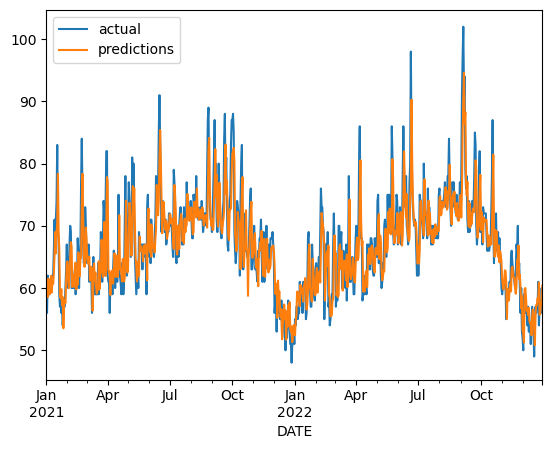

In [44]:
combined.plot()

In [45]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [46]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis = 1)
    combined.columns = ["actual", "predictions"]
    return error, combined
    

In [47]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [48]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-12-26,0.22,54.0,44.0,58.0,55.633333
2022-12-27,1.77,58.0,49.0,57.0,55.433333
2022-12-28,0.00,57.0,40.0,56.0,55.333333


In [49]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [50]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [51]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [52]:
core_weather = core_weather.iloc[30:, :].copy()

In [53]:
error, combined = create_predictions(predictors, core_weather, reg)

In [54]:
error

3.3186975255992452

<AxesSubplot:xlabel='DATE'>

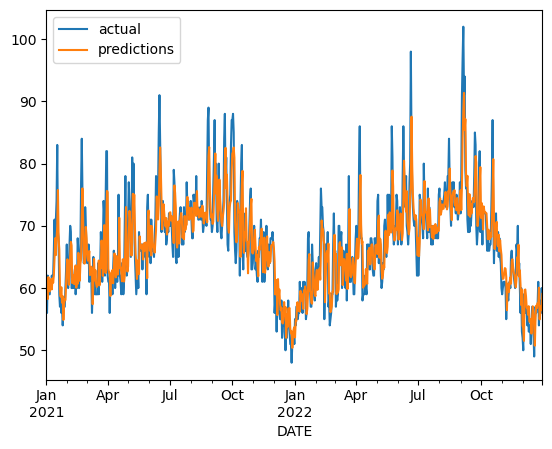

In [55]:
combined.plot()

In [57]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [58]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-12-26,0.22,54.0,44.0,58.0,55.633333,1.030247,1.227273,56.639807
2022-12-27,1.77,58.0,49.0,57.0,55.433333,0.955747,1.183673,56.640743
2022-12-28,0.00,57.0,40.0,56.0,55.333333,0.970760,1.425000,56.640990


In [60]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [61]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [62]:
error, combined = create_predictions(predictors, core_weather, reg)

In [63]:
error

3.2817145775353787

In [64]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.08006707,   0.14343362])

In [65]:
core_weather.corr()["target"]

precip            -0.205994
temp_max           0.821813
temp_min           0.595665
target             1.000000
month_max          0.687013
month_day_max     -0.422276
max_min            0.044981
monthly_avg        0.690551
day_of_year_avg    0.712415
Name: target, dtype: float64

In [66]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [67]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.769311,21.230689
2022-05-23,86.0,69.834590,16.165410
2021-01-17,83.0,68.585837,14.414163
2022-09-03,91.0,76.695391,14.304609
2022-09-05,102.0,87.766461,14.233539
